   #                                    TEK305 MACHINE LEARNING 
   #                                            Candidate No: 2011

## Problem 1: Regression Problem.

   ### 1. Use Multilinear Regression (MLR), and kNN Regressor to build a regression model for 
   ### prediction of house prices?

#### 1.1 Multilinear Regression

In [1]:
!pip install bioinfokit

In [2]:
#All imports required
#Panda for working with dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from bioinfokit.analys import get_data, stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [3]:
#importing dataset using pandas and displaying information as well as first five rows for dataset
df = pd.read_csv("C:/Users/tamed/Dropbox/Machine learning/Exam/Exam_Final_2021_TEK305/Regression_housedata.csv", delimiter = ';')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             999 non-null    int64  
 1   bedrooms       999 non-null    int64  
 2   sqft_living    999 non-null    int64  
 3   sqft_lot       999 non-null    int64  
 4   floors         999 non-null    int64  
 5   sqft_above     999 non-null    int64  
 6   sqft_basement  999 non-null    int64  
 7   price          999 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0


C:\Users\tamed\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


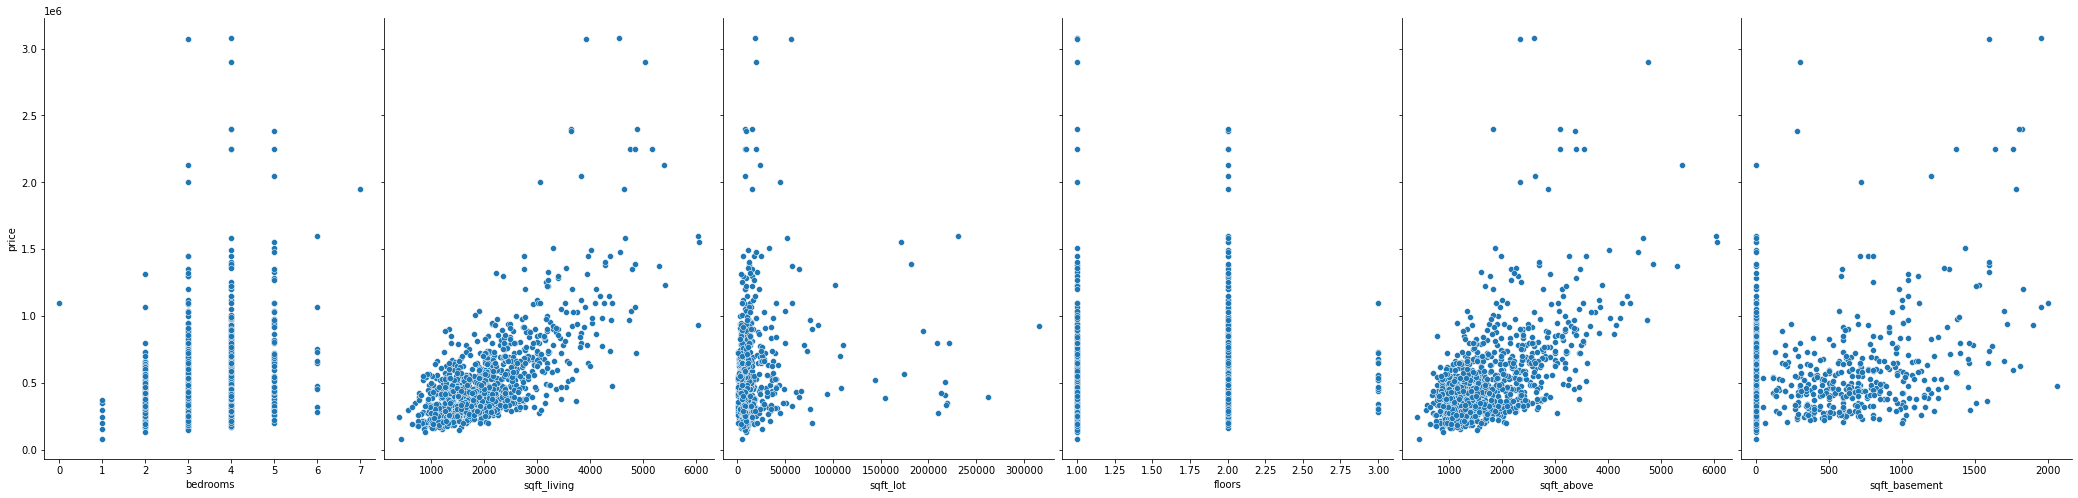

In [4]:
#Since Price is our response varibale. We are plotting a pairplot of all the input variables in x-axis 
#and reponse variable in y-axis to see the correlation
import seaborn as sns
sns.pairplot(df, x_vars=['bedrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement'],
             y_vars='price', size=7, aspect=0.7)

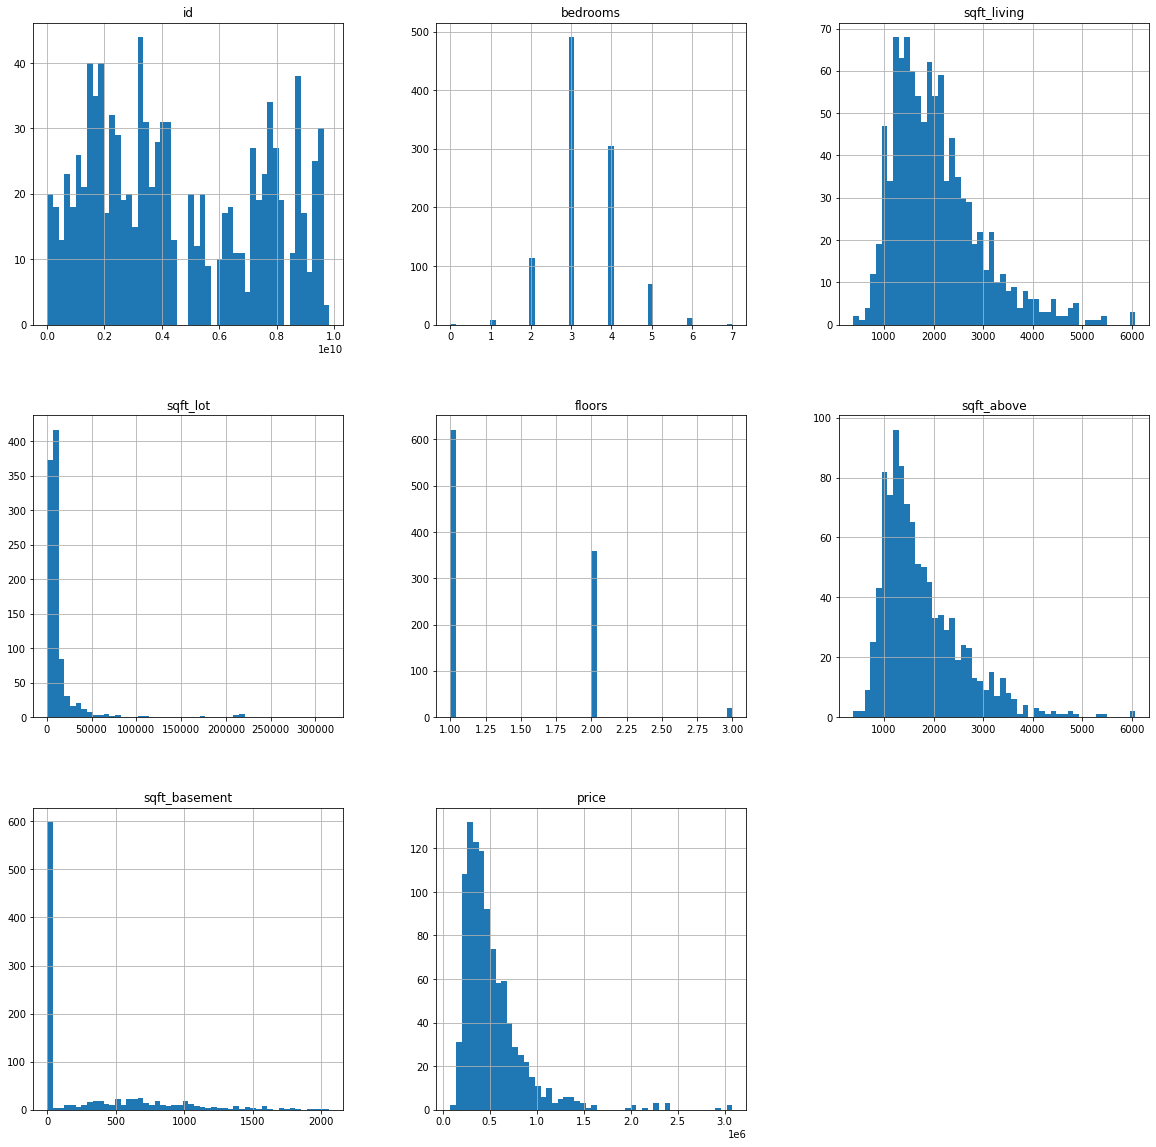

In [5]:
#Plotting histogram to check the data distribution
df.hist(bins = 50, figsize = (20,20))
plt.show()

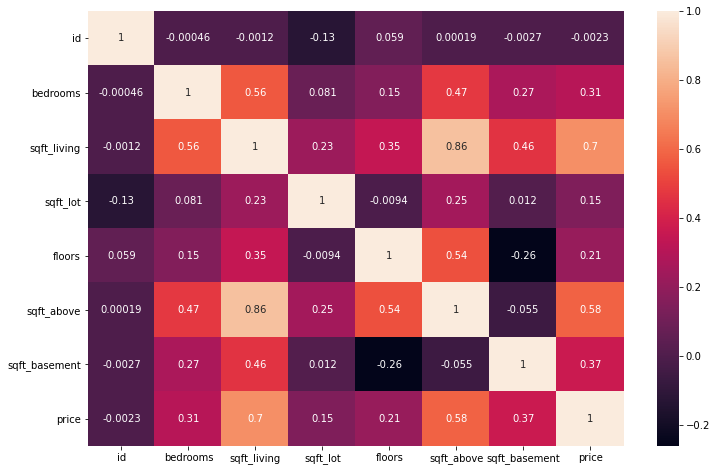

In [6]:
#A correlation chart can help us understand the relation 
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

In [7]:
df.columns

Index(['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'price'],
      dtype='object')

In [8]:
#Separating input and labels into X and Y respectively
X = df[['bedrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']] 
Y = df['price']
X

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1180,5650,1,1180,0
1,3,2570,7242,2,2170,400
2,2,770,10000,1,770,0
3,4,1960,5000,1,1050,910
4,3,1680,8080,1,1680,0
...,...,...,...,...,...,...
994,2,740,6460,1,740,0
995,4,1860,6325,2,1860,0
996,2,1590,20917,1,1590,0
997,2,850,2340,1,850,0


In [9]:
#Splitting dataset for in training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (799, 6) (799,)
Test set: (200, 6) (200,)


#### Performing MLR

In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [11]:
prediction = regr.predict(x_test)

C:\Users\tamed\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


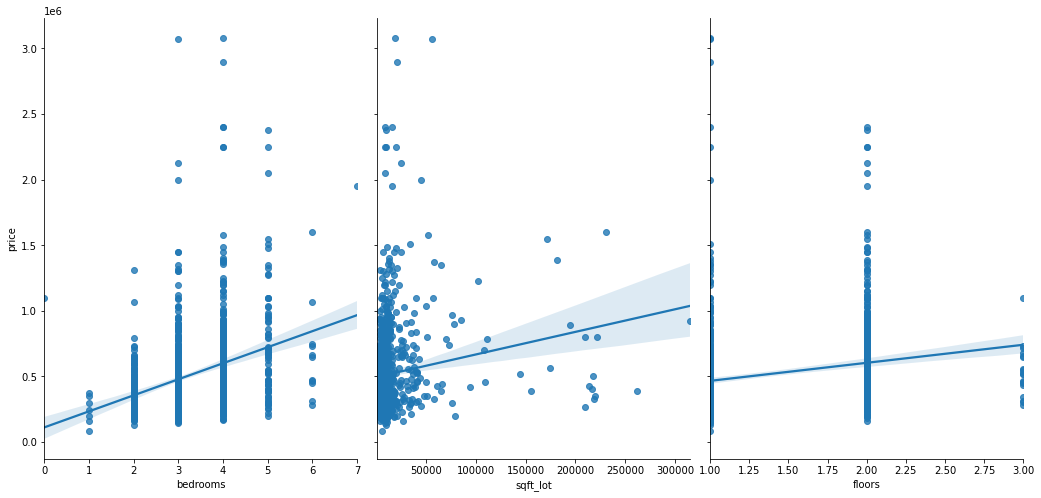

In [12]:
sns.pairplot(df, x_vars=['bedrooms','sqft_lot','floors'], y_vars='price', size=7, aspect=0.7,kind='reg')

In [13]:
#Getting coefficient of determination based on the true and predicted values
from sklearn import metrics

metrics.r2_score(y_test, prediction, multioutput='uniform_average')

0.5487996026420259

In [14]:
#Getting root mean squared error based on the true and predicted values
from math import sqrt

mse  = metrics.mean_squared_error(y_test, prediction)
rmse = sqrt(mse)
rmse

256296.19564810925

#### 1.2. kNN Regressor

In [15]:
#Separating input and labels into X and Y respectively
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above','sqft_basement']] .values
Y = df['price'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.41006301, -0.98140684, -0.3127439 , -0.75437123, -0.72174919,
        -0.66806957],
       [-0.41006301,  0.58407352, -0.25777261,  1.14390801,  0.53130247,
         0.21924658],
       [-1.58385369, -1.44316723, -0.16253969, -0.75437123, -1.24068978,
        -0.66806957],
       [ 0.76372767, -0.10293585, -0.33518821, -0.75437123, -0.88629133,
         1.35057468],
       [-0.41006301, -0.41828441, -0.22883672, -0.75437123, -0.08889482,
        -0.66806957]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (799, 6) (799,)
Test set: (200, 6) (200,)


In [17]:
#Checking rmse value for different values of k
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 323945.2283497551
RMSE value for k=  2 is: 275759.5005971644
RMSE value for k=  3 is: 267111.82093680144
RMSE value for k=  4 is: 269669.6058755979
RMSE value for k=  5 is: 271233.1396911071
RMSE value for k=  6 is: 270735.75935515924
RMSE value for k=  7 is: 263584.91964393
RMSE value for k=  8 is: 266676.62847842445
RMSE value for k=  9 is: 268756.70823607995
RMSE value for k=  10 is: 268614.3549875681
RMSE value for k=  11 is: 268428.74347950926
RMSE value for k=  12 is: 266392.66067051725
RMSE value for k=  13 is: 262386.2206739282
RMSE value for k=  14 is: 266014.2209583754
RMSE value for k=  15 is: 262396.93886141473
RMSE value for k=  16 is: 260868.0336852121
RMSE value for k=  17 is: 259580.11552380744
RMSE value for k=  18 is: 260546.73112744428
RMSE value for k=  19 is: 263820.75908425904
RMSE value for k=  20 is: 260277.64072492233
RMSE value for k=  21 is: 260192.11385433815
RMSE value for k=  22 is: 260861.17101412403
RMSE value for k=  23 is: 2624

<AxesSubplot:>

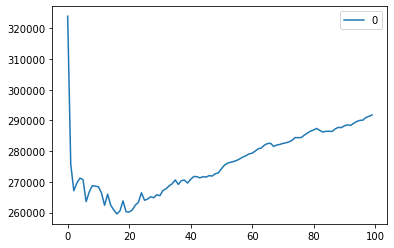

In [18]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [19]:
#Grid search will automatically give us the value of k with least rmse vale. The lower the romse value, the better the model performance
from sklearn.model_selection import GridSearchCV

k_values = list(range(1, 100))

params = {'n_neighbors':k_values}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 22}

In [20]:
#Getting rmse and coefficient of determination based on optimum value of k
k=22
model = neighbors.KNeighborsRegressor(n_neighbors = k)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= ' , k , 'is:', error)

#return coefficient of determination
testScore = model.score(x_test,y_test)
print("Coefficient of Determination:   ",testScore)

RMSE value for k=  22 is: 260861.17101412403
Coefficient of Determination:    0.5325835066088784


### Evaluation Model :
#### MLR Results:
#### RMSE : 256296.19564810925
#### Coefficient of determination: 0.5487996026420259
#### kNN Results:
#### RMSE : 260861.17101412403
####  Coefficient of determination: 0.5325835066088784

#### Since, MLR has higher R^2 value and lower RMSE value, it implies that MLR performs better than KNN

## Problem 2: Clustering Problem

In [21]:
#import dataset
import pandas as pd
df1 = pd.read_csv("C:/Users/tamed/Dropbox/Machine learning/Exam/Exam_Final_2021_TEK305/Clustering_diabetesdata.csv")
df1.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numb_of_Times_Preg          768 non-null    int64  
 1   PlasmaglucoseConcentration  768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinFoldThickness           768 non-null    int64  
 4   SerumInsulin                768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [23]:
#Get better understanding of the dataset
df1.describe()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


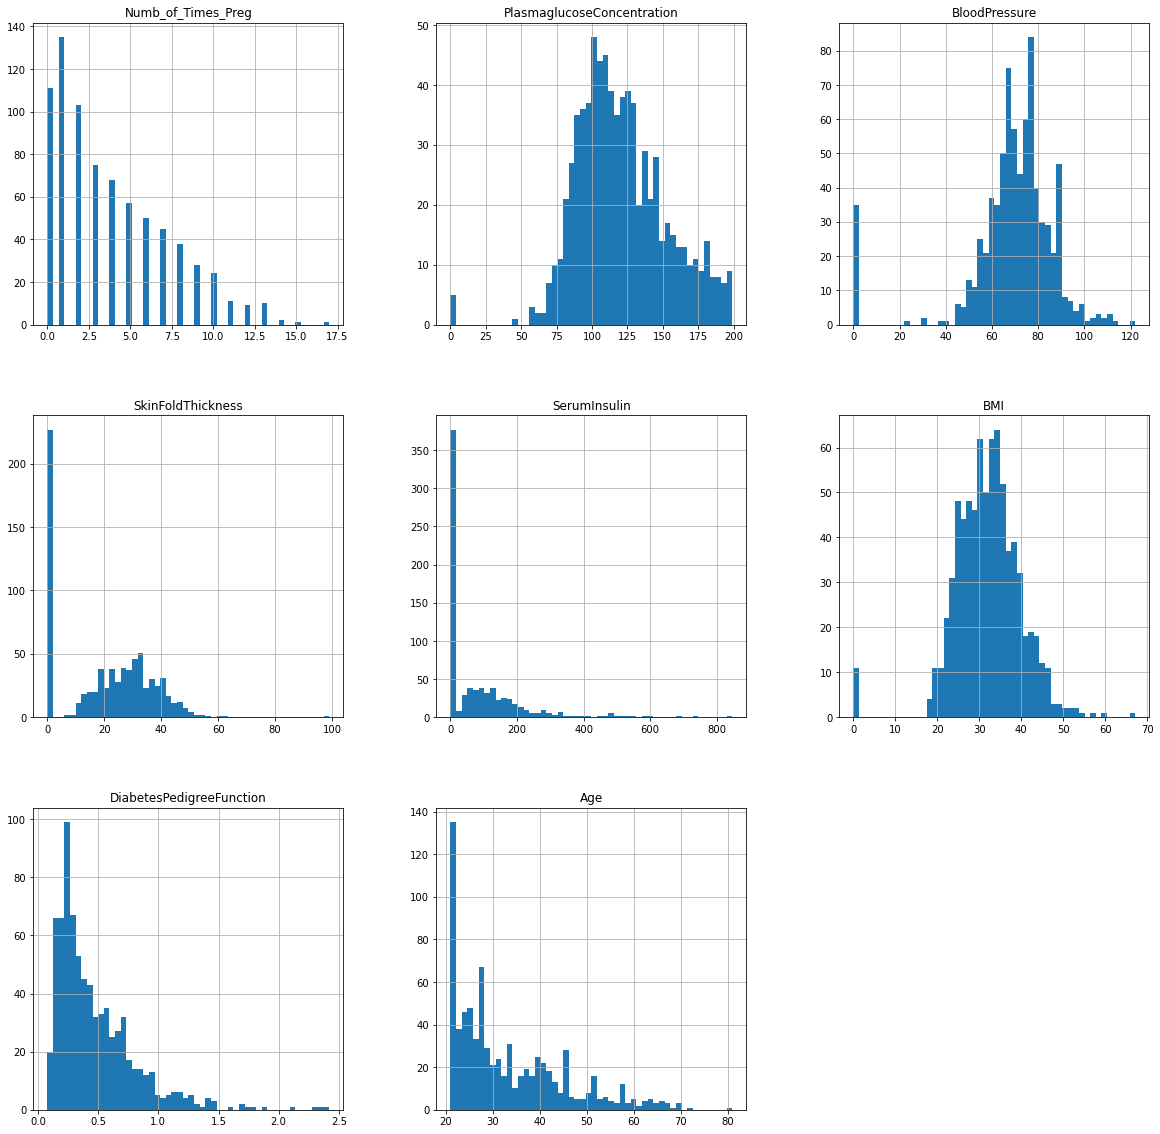

In [24]:
#Visualize the data
#import matplotlib.pyplot as plt
df1.hist(bins = 50, figsize = (20,20))
plt.show()

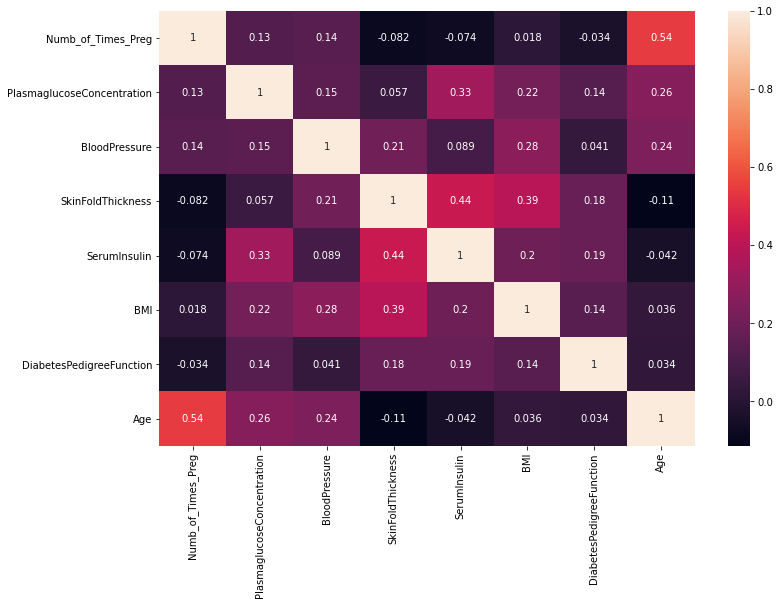

In [25]:
#Checking correlation of the features
import seaborn as sns
corr = df1.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

In [26]:
#Normalization
from sklearn.preprocessing import StandardScaler

X = df1.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0]

array([ 0.84832379,  0.14964075,  0.90726993, -0.69289057,  0.20401277,
        0.46849198,  1.4259954 ])

#### Performing K-means Clustering

In [27]:
from sklearn.cluster import KMeans 
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 1 0 1 2 1 1 3 2 0 0 0 0 2 0 3 4 1 4 4 2 0 0 4 0 4 0 1 0 0 0 2 1 1 0 1 0
 4 4 2 4 0 0 2 0 2 1 1 4 3 1 1 1 2 2 1 2 4 0 4 3 0 1 1 0 1 4 0 1 4 1 4 0 4
 1 1 1 4 3 1 1 3 1 1 0 4 4 4 4 1 1 4 4 0 1 2 1 1 1 4 0 1 1 1 1 1 1 4 4 4 4
 2 4 1 2 0 0 1 1 1 2 4 4 0 1 4 4 4 4 0 0 1 2 4 1 4 1 1 1 4 0 4 1 0 2 1 4 2
 0 1 4 1 2 2 0 4 1 1 1 2 4 4 4 1 0 1 4 1 1 1 1 4 3 4 1 2 0 4 0 0 1 1 1 1 0
 0 2 2 4 4 1 4 0 3 1 2 1 1 4 2 1 0 1 1 4 1 2 0 4 0 1 4 0 4 4 2 4 4 1 0 2 0
 3 2 1 4 1 4 2 4 0 2 1 1 1 0 2 4 0 1 1 4 1 2 4 0 0 2 2 1 0 1 1 4 1 4 4 1 2
 2 0 3 4 0 0 0 3 4 1 3 4 1 0 4 0 4 1 1 0 1 0 4 0 0 0 0 2 2 1 4 4 4 2 4 0 2
 2 4 4 0 3 4 4 4 0 4 0 1 2 2 1 4 1 1 4 4 1 0 4 0 1 4 1 0 4 1 4 0 4 4 0 1 3
 0 1 2 3 0 2 0 1 1 1 0 0 4 1 3 1 4 1 0 4 1 1 0 2 3 4 2 2 0 0 0 2 4 1 1 1 0
 2 1 1 4 4 2 1 4 0 4 4 1 1 1 1 1 4 4 2 1 4 0 2 1 0 2 1 4 1 4 1 0 4 1 0 4 0
 1 0 2 4 4 2 1 4 2 1 4 1 1 4 1 4 1 2 2 3 2 4 4 3 1 1 1 1 3 4 0 1 0 0 1 4 1
 1 2 1 4 4 1 1 1 4 3 4 0 0 1 2 0 0 1 4 1 0 1 1 4 3 2 4 4 4 0 1 0 4 1 4 0 2
 4 1 4 3 2 2 2 1 0 4 4 4 

In [28]:
#insights: which example belongs to which cluster 0 or 1.
df1["Clus_km"] = labels
df1.head(5)

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Clus_km
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [29]:
#Checking mean of features in each cluster. 
df1.groupby('Clus_km').mean()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
Clus_km,,,,,,,,
0,5.922156,139.670659,78.982036,7.868263,18.209581,31.553293,0.440377,46.796407
1,2.658730,101.341270,66.785714,13.976190,44.841270,27.187698,0.433234,26.059524
2,4.120370,156.851852,74.166667,35.203704,274.046296,36.901852,0.752185,35.462963
3,3.555556,117.000000,0.666667,2.000000,0.694444,25.763889,0.393167,30.444444
4,3.517073,111.375610,73.263415,34.448780,84.502439,36.764390,0.411185,30.346341


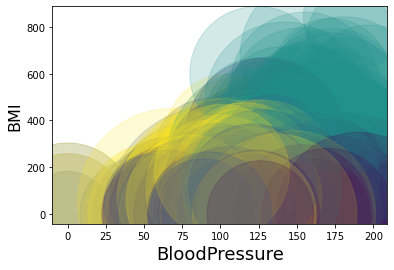

In [30]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.2)
plt.xlabel('BloodPressure', fontsize=18)
plt.ylabel('BMI', fontsize=16)

plt.show()

#### Hierarchical clustering

In [31]:
#Calculate the distance matrix based using euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         2.86762773 3.20378677 ... 2.70840607 2.57807927 3.06062283]
 [2.86762773 0.         3.72150542 ... 1.60166895 2.6650958  0.91047974]
 [3.20378677 3.72150542 0.         ... 2.96496339 2.55942022 3.79111458]
 ...
 [2.70840607 1.60166895 2.96496339 ... 0.         2.42334341 1.63088467]
 [2.57807927 2.6650958  2.55942022 ... 2.42334341 0.         3.04917966]
 [3.06062283 0.91047974 3.79111458 ... 1.63088467 3.04917966 0.        ]]


In [32]:
import pylab
import scipy.cluster.hierarchy as hierarchy
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-32-b339f1787f1f>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


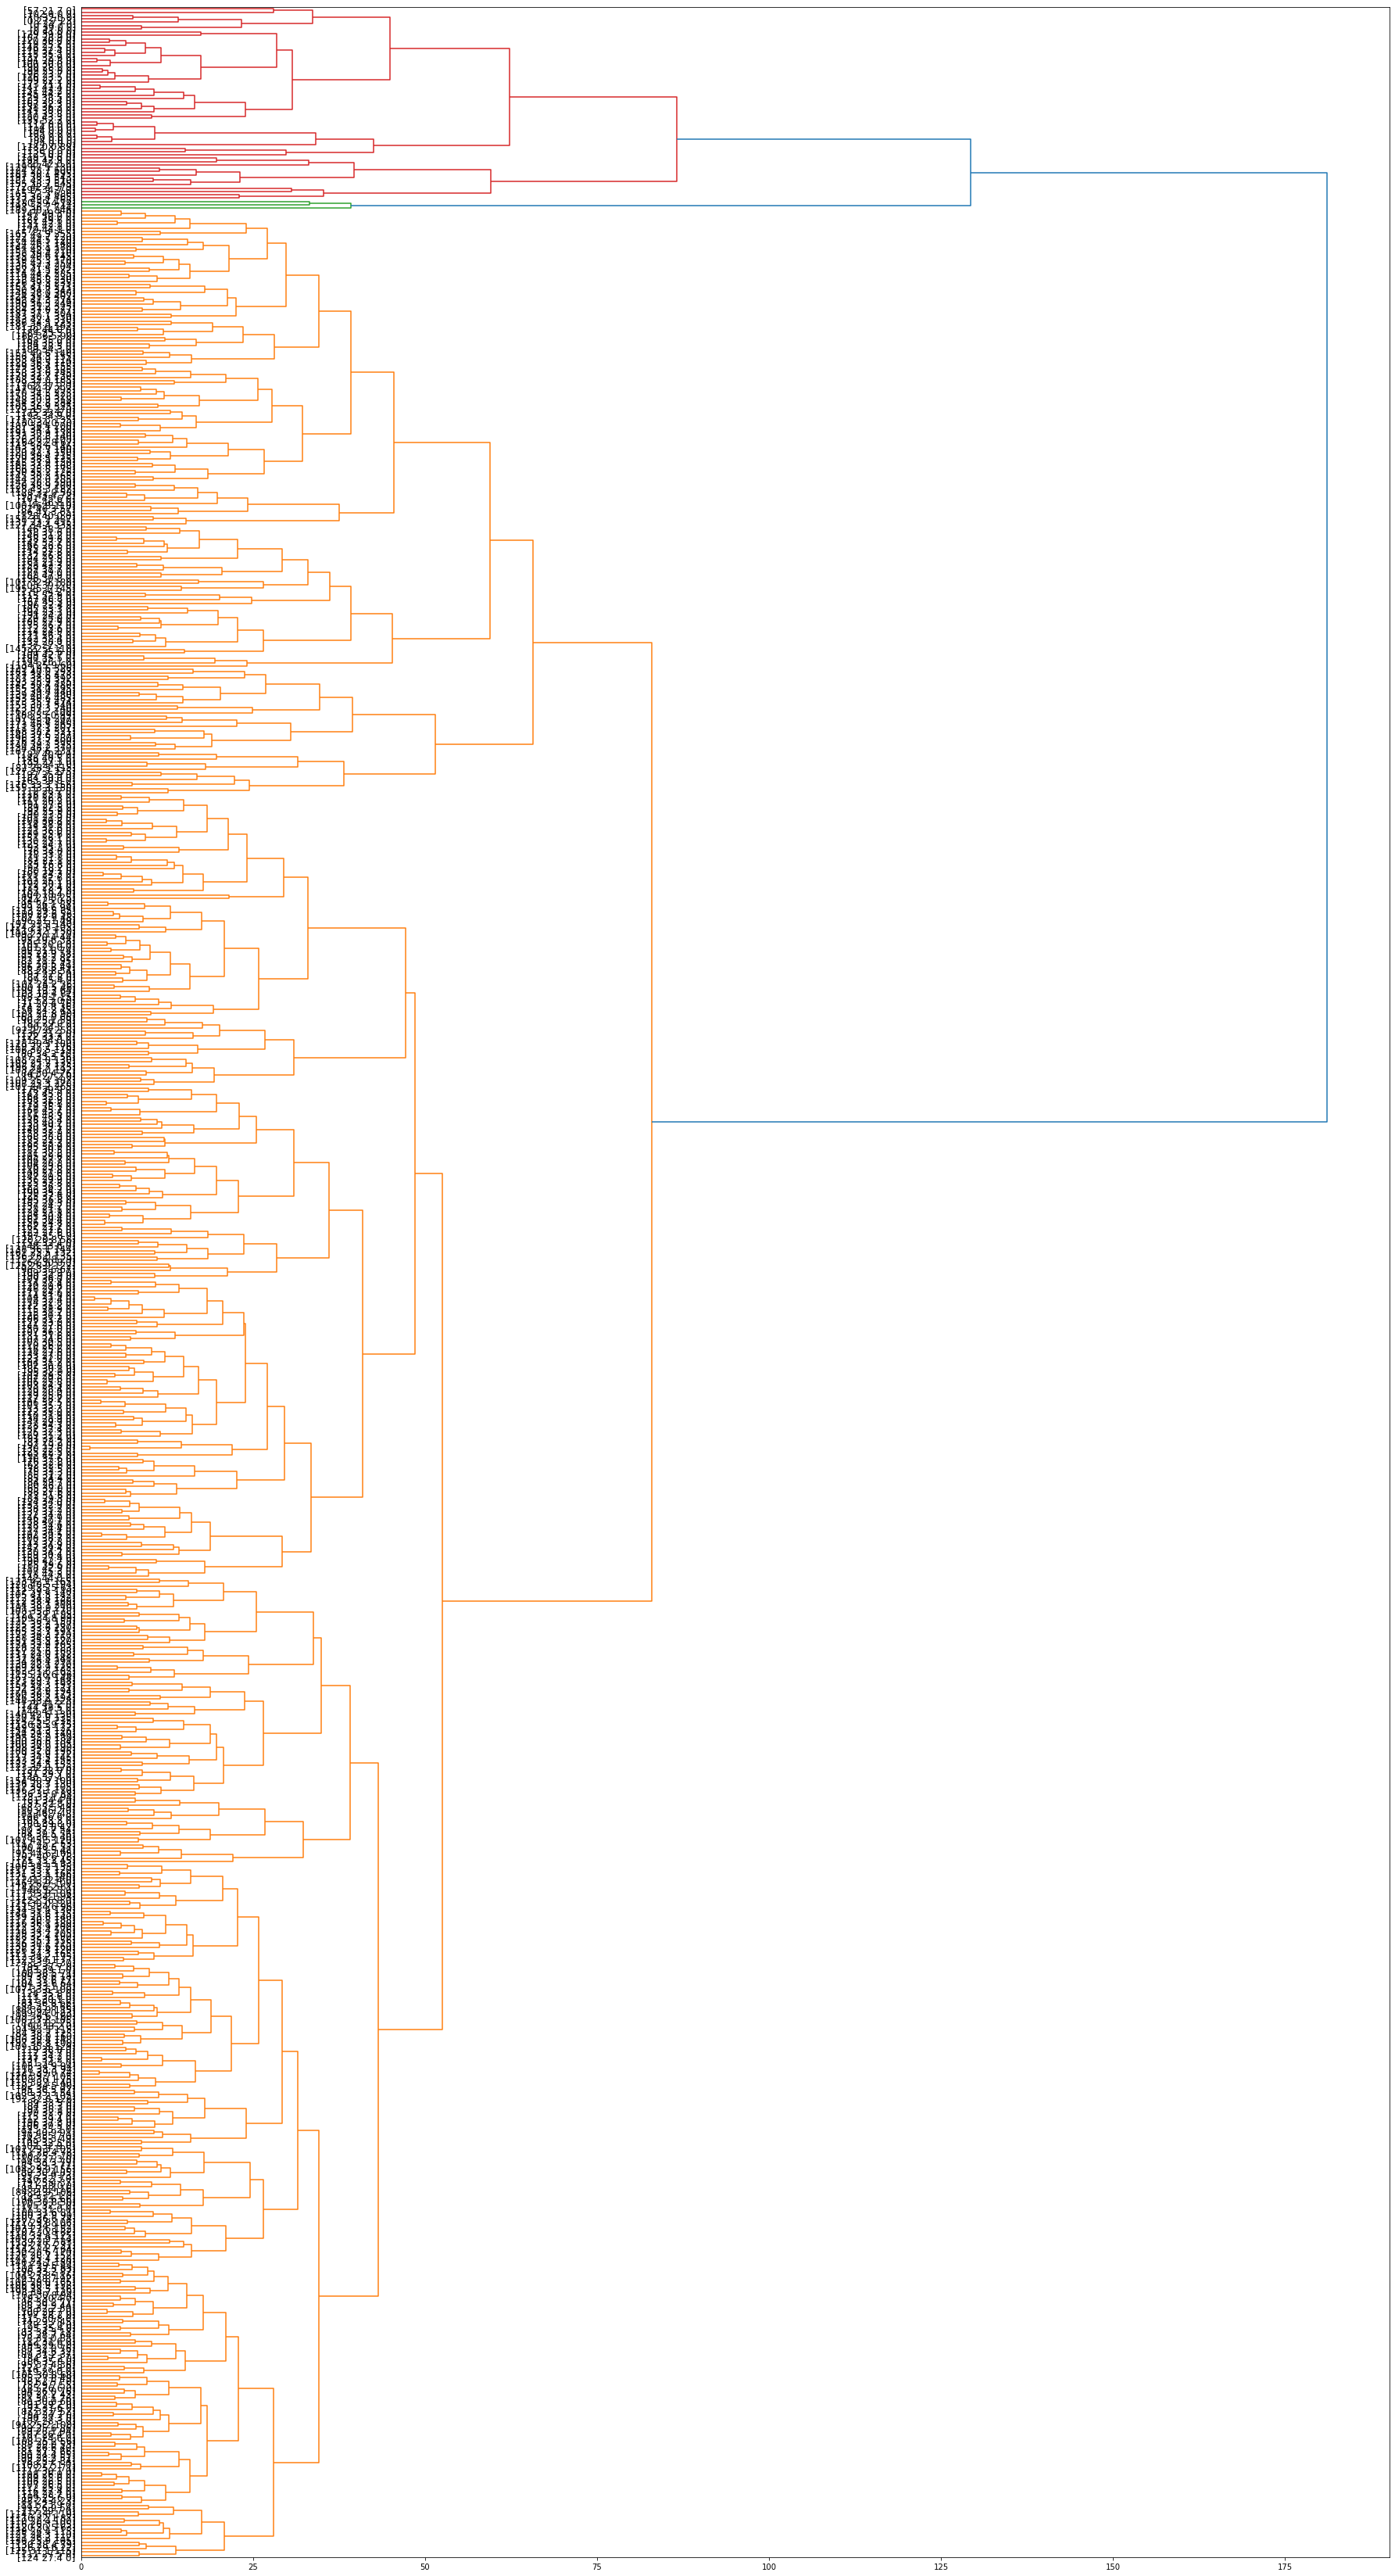

In [33]:
#Plotting heirarhy of the plot
fig = pylab.figure(figsize=(30,60))
def llf(id):
    return '[%s %s %s]' % (df1['PlasmaglucoseConcentration'][id], df1['BMI'][id], int(float(df1['SerumInsulin'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [34]:
#Getting cluster number of each example
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\tamed\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 4, 4, 4, 3, 4, 4, 1, 3, 1, 4, 4, 0, 2, 0, 1, 0, 4, 4, 4, 0, 4,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0,
       4, 3, 4, 4, 4, 1, 4, 4, 4, 0, 0, 4, 0, 0, 0, 4, 1, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 0, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 1, 4, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 0,
       4, 3, 4, 4, 4, 4, 1, 4, 4, 0, 3, 0, 4, 4, 4, 4, 4, 1, 4, 0, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4,
       0, 0, 1, 0, 4, 4, 4, 0, 2, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, 4, 0,
       4, 4, 1, 0, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       3, 0, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 0, 1,

In [35]:
#Adding corresponding cluster number to the example
df1['cluster_'] = agglom.labels_
df1.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Clus_km,cluster_
0,6,148,72,35,0,33.6,0.627,50,0,4
1,1,85,66,29,0,26.6,0.351,31,1,4
2,8,183,64,0,0,23.3,0.672,32,0,4
3,1,89,66,23,94,28.1,0.167,21,1,4
4,0,137,40,35,168,43.1,2.288,33,2,3


In [36]:
#Mean of the data based on each cluster
df1.groupby('cluster_').mean()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Clus_km
cluster_,,,,,,,,,
0,4.613636,147.482955,78.920455,26.960227,146.392045,36.111932,0.596182,41.346591,1.642045
1,3.422222,103.577778,15.888889,5.488889,2.488889,24.128889,0.431244,32.222222,2.622222
2,1.666667,188.666667,69.333333,41.666667,534.666667,42.066667,1.715667,38.333333,2.000000
3,2.307692,168.461538,76.000000,45.000000,362.692308,41.092308,0.925846,36.076923,2.153846
4,3.676083,112.001883,70.192090,18.964218,54.783427,31.013936,0.415977,30.542373,1.798493


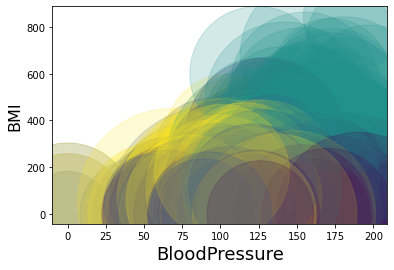

In [37]:
#Visulaization
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.2)
plt.xlabel('BloodPressure', fontsize=18)
plt.ylabel('BMI', fontsize=16)

plt.show()

## Problem 3: Deep Learning Problem Using Keras

###  Loading dataset

In [38]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.24.1


In [40]:
# loading the dataset
data = pd.read_csv('C:/Users/tamed/Dropbox/Machine learning/Exam/Exam_Final_2021_TEK305/Deep_Learning_task_train_dataset.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Preprocessing dataset

In [41]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4182.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12.959605,0.065671,141.344520,1997.900800,2188.381667
std,4.661704,0.051206,62.401514,8.290423,1703.131187
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.890000,0.026839,94.119250,1987.000000,846.231800
50%,12.800000,0.054251,143.315400,1999.000000,1808.312800
75%,17.100000,0.093850,186.472700,2004.000000,3091.975200
max,21.350000,0.328391,266.888400,2009.000000,11445.102000


In [42]:
# checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### **Dealing with missing values** 
Since columns "Item_Weight" and "Outlet_Size" have missing values. We will fill **"Item_Weight"** with the mean value of that column. From above dataset description, we can see that "Item_Weight" has **mean** of 12.95960. Since **"Outlet_Size"** nominal values, we will fill the missing value with **mode**, the most commom value of that column. 

In [43]:
data['Item_Weight'].fillna( data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

#Again testing missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
# checking the data type
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [45]:
# removing the Item_Identifier, Outlet_Identifier since these are just the unique values
data = data.drop('Item_Identifier', axis=1)
data = data.drop('Outlet_Identifier', axis=1)

In [46]:
#checking contents of the column
data['Item_Fat_Content'].value_counts()

Low Fat    3008
Regular    1679
LF          183
reg          68
low fat      62
Name: Item_Fat_Content, dtype: int64

In [47]:
#Low Fat, low fat and LF, and reg and Regular represent the same meaning
data['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
data['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [48]:
#rechecking the values
data['Item_Fat_Content'].value_counts()

Low Fat    3253
Regular    1747
Name: Item_Fat_Content, dtype: int64

In [49]:
data['Item_Type'].value_counts()

Fruits and Vegetables    733
Snack Foods              702
Household                532
Frozen Foods             515
Dairy                    401
Canned                   389
Baking Goods             370
Health and Hygiene       274
Soft Drinks              265
Meat                     251
Breads                   153
Hard Drinks              128
Others                    96
Starchy Foods             86
Breakfast                 66
Seafood                   39
Name: Item_Type, dtype: int64

In [50]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
data['Outlet_Establishment_Year'].value_counts()

1985    818
2002    569
2004    559
1997    559
1987    558
2007    542
1999    541
2009    526
1998    328
Name: Outlet_Establishment_Year, dtype: int64

In [52]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [53]:
data['Item_Outlet_Sales'].describe()

count     5000.000000
mean      2188.381667
std       1703.131187
min         33.290000
25%        846.231800
50%       1808.312800
75%       3091.975200
max      11445.102000
Name: Item_Outlet_Sales, dtype: float64

In [54]:
data['Outlet_Type'].value_counts()

Supermarket Type1    3328
Grocery Store         608
Supermarket Type3     538
Supermarket Type2     526
Name: Outlet_Type, dtype: int64

In [55]:
#Splitting Input and output features
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [56]:
#Splitting training and testing features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
categorical_features = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size']
numerical_features = ['Item_Visibility','Item_MRP','Outlet_Establishment_Year']

In [58]:
#Encoding nominal features
X_train = pd.get_dummies(X_train, columns=categorical_features)
X_test = pd.get_dummies(X_test, columns=categorical_features)


In [59]:
#from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [60]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 32), (4000,)), ((1000, 32), (1000,)))

### Defining the architecture of the model

In [61]:
# checking the version of keras
import keras
print(keras.__version__)

2.6.0


In [62]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.1


In [63]:
from tensorflow.keras import layers

### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [64]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [65]:
#Getting number input features as input neurons. Value will be 32 in our case
input_neurons = X_train.shape[1]

In [66]:
#Since we are predicting the outlet sales. Our output will be a single numeric value in the output layer
output_layer = 1

In [67]:
# define hidden layers and neuron in each layer.  
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 15
neuron_hidden_layer_2 = 5

### **Vanishing Gradient Problem**
The vanishing gradients problem is one example of unstable behavior that you may encounter when training a deep neural network.

It describes the situation where a deep multilayer feed-forward network or a recurrent neural network is unable to propagate useful gradient information from the output end of the model back to the layers near the input end of the model.

The result is the general inability of models with many layers to learn on a given dataset, or for models with many layers to prematurely converge to a poor solution.

### **ReLU activation function**

The rectified linear activation function, or ReLU activation function, is perhaps the most common function used for hidden layers.

It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units.

The ReLU function is calculated as follows:

max(0.0, x)
This means that if the input value (x) is negative, then a value 0.0 is returned, otherwise, the value is returned.

In [68]:
# activation function of different layers
# I have picked relu as an activation function for hidden layers

### The linear activation function
The linear activation function is also called “identity” (multiplied by 1.0) or “no activation.”

This is because the linear activation function does not change the weighted sum of the input in any way and instead returns the value directly.

In [69]:
#Since, it is regression probelm no activation is provided in the output/last layer

In [70]:
#Defining the architecture of the model and Layers
def build_and_compile_model(input_neurons):
  model = tf.keras.Sequential([
      layers.InputLayer(input_shape=(input_neurons, )),
      layers.Dense(neuron_hidden_layer_1, activation='relu'),
      layers.Dense(neuron_hidden_layer_2, activation='relu'),
      layers.Dense(output_layer)
                             ])

  #Mean squared error will be used as our loss function since it is a regression propblem where we have to predict sales 
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [71]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

480

In [72]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 15

495

In [73]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

80

In [74]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_layer + 1

6

### Compiling the Model

In [75]:
# We are passing normalizer to the model for defining input layer containing neurons equal to input dimensions of the dataset 
ml_model = build_and_compile_model(input_neurons)
# Model summary gives the information about layers involved
ml_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                495       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [76]:
# training the model

#Validation split of 0.2 means that 20% of the training data would be used for validation

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 5

# storing the trained model in model_history variable which will be used to visualize the training process
history = ml_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300)

Epoch 1/300
100/100 [==============================] - 0s 2ms/step - loss: 7762093.0000 - val_loss: 7486882.0000
Epoch 2/300
100/100 [==============================] - 0s 1ms/step - loss: 7729135.5000 - val_loss: 7437542.0000
Epoch 3/300
100/100 [==============================] - 0s 1ms/step - loss: 7652189.0000 - val_loss: 7329375.5000
Epoch 4/300
100/100 [==============================] - 0s 1ms/step - loss: 7500871.0000 - val_loss: 7134245.0000
Epoch 5/300
100/100 [==============================] - 0s 1ms/step - loss: 7243178.0000 - val_loss: 6820461.0000
Epoch 6/300
100/100 [==============================] - 0s 1ms/step - loss: 6852971.5000 - val_loss: 6369842.0000
Epoch 7/300
100/100 [==============================] - 0s 1ms/step - loss: 6322540.0000 - val_loss: 5801085.5000
Epoch 8/300
100/100 [==============================] - 0s 1ms/step - loss: 5681649.5000 - val_loss: 5142744.5000
Epoch 9/300
100/100 [==============================] - 0s 1ms/step - loss: 4974269.0000 - val_lo

Epoch 73/300
100/100 [==============================] - 0s 1ms/step - loss: 1156486.5000 - val_loss: 1376838.1250
Epoch 74/300
100/100 [==============================] - 0s 978us/step - loss: 1156011.6250 - val_loss: 1375900.5000
Epoch 75/300
100/100 [==============================] - 0s 970us/step - loss: 1155299.2500 - val_loss: 1376846.1250
Epoch 76/300
100/100 [==============================] - 0s 1ms/step - loss: 1154516.8750 - val_loss: 1376176.7500
Epoch 77/300
100/100 [==============================] - 0s 996us/step - loss: 1153733.0000 - val_loss: 1375766.1250
Epoch 78/300
100/100 [==============================] - 0s 1ms/step - loss: 1153338.5000 - val_loss: 1375091.6250
Epoch 79/300
100/100 [==============================] - 0s 999us/step - loss: 1152719.5000 - val_loss: 1376281.8750
Epoch 80/300
100/100 [==============================] - 0s 972us/step - loss: 1151578.2500 - val_loss: 1374783.8750
Epoch 81/300
100/100 [==============================] - 0s 975us/step - loss: 

Epoch 144/300
100/100 [==============================] - 0s 943us/step - loss: 1123703.5000 - val_loss: 1367576.7500
Epoch 145/300
100/100 [==============================] - 0s 991us/step - loss: 1123466.2500 - val_loss: 1367502.2500
Epoch 146/300
100/100 [==============================] - 0s 901us/step - loss: 1123035.5000 - val_loss: 1367391.5000
Epoch 147/300
100/100 [==============================] - 0s 954us/step - loss: 1122810.3750 - val_loss: 1367078.2500
Epoch 148/300
100/100 [==============================] - 0s 1ms/step - loss: 1122404.3750 - val_loss: 1366022.1250
Epoch 149/300
100/100 [==============================] - 0s 1ms/step - loss: 1122129.5000 - val_loss: 1366546.8750
Epoch 150/300
100/100 [==============================] - 0s 940us/step - loss: 1121829.5000 - val_loss: 1367225.2500
Epoch 151/300
100/100 [==============================] - 0s 995us/step - loss: 1121263.1250 - val_loss: 1367017.1250
Epoch 152/300
100/100 [==============================] - 0s 922us/st

100/100 [==============================] - 0s 964us/step - loss: 1107399.2500 - val_loss: 1364648.6250
Epoch 215/300
100/100 [==============================] - 0s 943us/step - loss: 1107239.2500 - val_loss: 1364090.7500
Epoch 216/300
100/100 [==============================] - 0s 981us/step - loss: 1107114.3750 - val_loss: 1365052.6250
Epoch 217/300
100/100 [==============================] - 0s 1ms/step - loss: 1106416.2500 - val_loss: 1363489.2500
Epoch 218/300
100/100 [==============================] - 0s 965us/step - loss: 1107063.2500 - val_loss: 1364021.8750
Epoch 219/300
100/100 [==============================] - 0s 996us/step - loss: 1106384.2500 - val_loss: 1364755.6250
Epoch 220/300
100/100 [==============================] - 0s 982us/step - loss: 1106283.5000 - val_loss: 1363426.8750
Epoch 221/300
100/100 [==============================] - 0s 975us/step - loss: 1106271.5000 - val_loss: 1364777.8750
Epoch 222/300
100/100 [==============================] - 0s 990us/step - loss: 1

100/100 [==============================] - 0s 973us/step - loss: 1098123.6250 - val_loss: 1363265.8750
Epoch 285/300
100/100 [==============================] - 0s 999us/step - loss: 1098308.7500 - val_loss: 1361823.0000
Epoch 286/300
100/100 [==============================] - 0s 937us/step - loss: 1098011.2500 - val_loss: 1362265.1250
Epoch 287/300
100/100 [==============================] - 0s 966us/step - loss: 1097651.3750 - val_loss: 1361176.0000
Epoch 288/300
100/100 [==============================] - 0s 945us/step - loss: 1097745.5000 - val_loss: 1361456.6250
Epoch 289/300
100/100 [==============================] - 0s 920us/step - loss: 1097942.3750 - val_loss: 1362591.3750
Epoch 290/300
100/100 [==============================] - 0s 1ms/step - loss: 1097445.5000 - val_loss: 1362275.8750
Epoch 291/300
100/100 [==============================] - 0s 998us/step - loss: 1097585.6250 - val_loss: 1361591.0000
Epoch 292/300
100/100 [==============================] - 0s 987us/step - loss: 1

### *Evaluating the Model*

In [77]:
#Getting the mean squared error of the model since our loss function was in mean squared error
test_results = ml_model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 1175087.6250


In [78]:
# getting predictions for the validation set
prediction = ml_model.predict(X_test)

In [79]:
#GEtting coefficient of determination based on the true and predicted values
sklearn.metrics.r2_score(y_test, prediction, multioutput='uniform_average')

0.5929748962171263

### Visualizing the model performance

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
295,1096897.375,1361833.750,295
296,1096765.750,1361310.375,296
297,1096673.875,1362328.125,297
298,1095835.500,1362037.125,298
299,1096319.000,1362286.125,299


In [81]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1700000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Sales]')
  plt.legend()
  plt.grid(True)

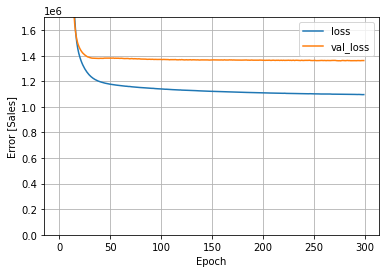

In [82]:
plot_loss(history)

### Prediction on Test dataset

In [83]:
test_dataset = pd.read_csv("C:/Users/tamed/Dropbox/Machine learning/Exam\Exam_Final_2021_TEK305/Deep_Learning_task_test_dataset.csv")

In [84]:
test_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCF31,9.130,Low Fat,0.051928,Household,151.4024,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDD59,10.500,Regular,0.000000,Starchy Foods,78.2960,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
2,FDQ52,17.000,Low Fat,0.119571,Frozen Foods,249.7434,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
3,FDP09,NaN,Low Fat,0.033726,Snack Foods,211.6902,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
4,FDK24,9.195,Low Fat,0.101276,Baking Goods,46.4744,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN


In [85]:
test_dataset .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3523 non-null   object 
 1   Item_Weight                2878 non-null   float64
 2   Item_Fat_Content           3523 non-null   object 
 3   Item_Visibility            3523 non-null   float64
 4   Item_Type                  3523 non-null   object 
 5   Item_MRP                   3523 non-null   float64
 6   Outlet_Identifier          3523 non-null   object 
 7   Outlet_Establishment_Year  3523 non-null   int64  
 8   Outlet_Size                2552 non-null   object 
 9   Outlet_Location_Type       3523 non-null   object 
 10  Outlet_Type                3523 non-null   object 
 11  Item_Outlet_Sales          0 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 330.4+ KB


In [86]:
test_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                   645
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   971
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            3523
dtype: int64

#### **Dealing with missing values** 
Since columns "Item_Weight" and "Outlet_Size" have missing values. We will fill **"Item_Weight"** with the mean value of that column. From above dataset description, we can see that "Item_Weight" has **mean** of 12.95960. Since **"Outlet_Size"** nominal values, we will fill the missing value with **mode**, the most commom value of that column. 

In [87]:
test_dataset['Item_Weight'].fillna( test_dataset['Item_Weight'].mean(), inplace=True)
test_dataset['Outlet_Size'] =test_dataset['Outlet_Size'].fillna(test_dataset['Outlet_Size'].mode()[0])

#Again testing missing values
test_dataset.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            3523
dtype: int64

In [88]:
#checking contents of the column
test_dataset['Item_Fat_Content'].value_counts()

Low Fat    2081
Regular    1210
LF          133
low fat      50
reg          49
Name: Item_Fat_Content, dtype: int64

In [89]:
#Low Fat, low fat and LF, and reg and Regular represent the same meaning
test_dataset['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
test_dataset['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [90]:
#checking contents of the column
test_dataset['Item_Fat_Content'].value_counts()

Low Fat    2264
Regular    1259
Name: Item_Fat_Content, dtype: int64

In [91]:
#checking contents of the column
test_dataset['Item_Fat_Content'].value_counts()
test_dataset['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [92]:
#Splitting Input and output features
X_test_dataset = test_dataset.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
X_test_dataset.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [93]:
categorical_features = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size']
numerical_features = ['Item_Visibility','Item_MRP','Outlet_Establishment_Year']

In [94]:
#Encoding nominal features
X_test_dataset = pd.get_dummies(X_test_dataset, columns=categorical_features)


In [95]:
X_test_dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,9.130000,0.051928,151.4024,1999,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,10.500000,0.000000,78.2960,1997,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,17.000000,0.119571,249.7434,1999,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,12.709487,0.033726,211.6902,1985,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,9.195000,0.101276,46.4744,2004,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [96]:
#normalize
X_test_dataset = preprocessing.StandardScaler().fit(X_test_dataset).transform(X_test_dataset.astype(float))


In [97]:
# getting predictions for the testing set
prediction_test_dataset = ml_model.predict(X_test_dataset)
len(prediction_test_dataset)

3523

In [98]:
test_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [99]:
test_dataset['Item_Outlet_Sales'] = prediction_test_dataset

In [100]:
results = test_dataset[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [101]:
results.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,NCF31,OUT049,2349.853760
1,FDD59,OUT046,1677.501587
2,FDQ52,OUT049,4584.550781
3,FDP09,OUT027,5697.475098
4,FDK24,OUT035,953.663940


In [102]:
#Saving results to csv
results.to_csv("C:/Users/tamed/Dropbox/Machine learning/Exam/Exam_Final_2021_TEK305/predictions.csv")